# Data augmentation to address overfitting

Video number 26

Video = "https://youtu.be/mTVf7BN7S8w?si=kg0IqZxVh7aFgSIb"

## Introduction

If you have watched and did the Previous CNN videos, u would know that CNN, out of the box are not scaled or rotation invariant, which means, lets say you are tring to classify roses and tulips and the Training set contains the proper clear images of these two flowers.

Now After Training your CNN, when you supply a rotated image of lets say a Rose for the Classification, CNN might not perform well.

So to handle this problem we use a technique called **Data Augmentation**

In **Data Augmentation**, from your exisiting Training samples, you try to Generate new samples, for example we have a picture of this flower here

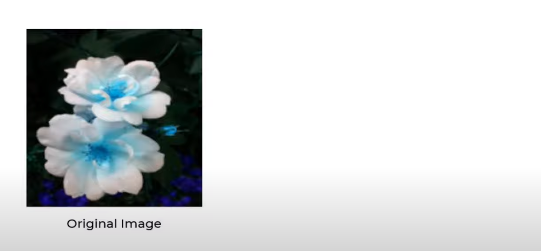

And our Original datasets contains only like one type of flower image, like a clear unrotated image, Now what we can do is, we can Apply several Transformations such as Horizontal flip, Rotation, Contrast, Zooming, etc and we can Generate new samples through this

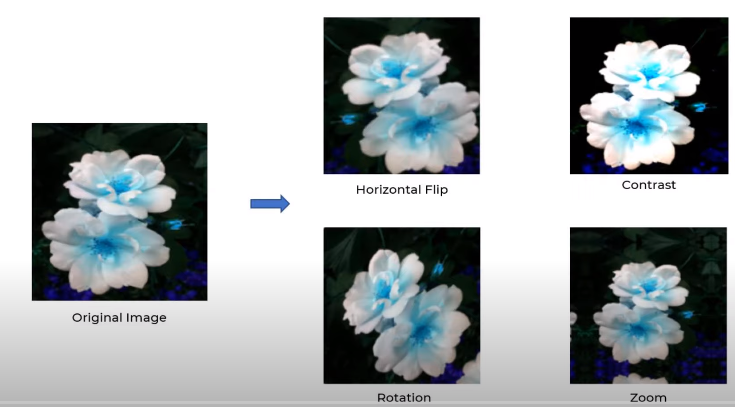

So above you can see, we Generated 4 new samples out of 1, and this Technique is very effective.

In this Tutorial, we will do Flower Classifcation using CNN, We will see how the Model overfits the data and how we can use **Data Augmentation** to Generate new samples and increase the Accuracy of our model

## The Dataset

We are going to use Tensorflow's Flower dataset for this tutorial

## ---------------------- Python Code ----------------------

So now we will import some Important Libraries

We will be using some additional libraries such as:

* cv2 - (pip install opencv-python)
    The cv2 module in Python is part of the OpenCV (Open Source Computer Vision Library) package. OpenCV is a highly optimized library focused on real-time computer vision applications. The cv2 module provides functionalities for various image and video processing tasks. 
* os - To work with the OS by creating directories or loading them
* PIL - To be able to display and resize images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras import layers

## Downloading the Dataset

so first thing we are going to do is, we will be downloading Tensorflow's flower dataset from Google website, so Google website has this zip file which contains photos of different flowers, and Tensorflow has this function called "**get_file()**".

**Let's break down the arguments in the tf.keras.utils.get_file function:**

1. 'flower_photos': This is the fname argument, which specifies the name of the file or directory to be downloaded. In this case, it's named 'flower_photos'.
2. origin=dataset_url: The origin argument is the URL from which to download the file. Here, dataset_url contains the link to the compressed flower dataset.
3. cache_dir='.': The cache_dir argument specifies the directory in which to cache the downloaded file. The dot ('.') indicates the current working directory.
4. untar=True: The untar argument indicates whether to extract the contents of the downloaded file if it's a tarball (a .tar or .tgz file). If untar is set to True, the file will be extracted after downloading.

Then we will simply store it in the "**data_dir**" variable

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file("flower_images", origin=dataset_url, 
                     cache_dir="C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\DEEP LEARNING\\CODEBASICS\\datas\\", 
                                untar=True)

228813984/228813984 [==============================] - 39s 0us/step


So If You go and check the path you will see it created a new folder where theres a folder called "flower_images" where all the flowers images have been downloaded.

Lets check what data_dir is

In [3]:
data_dir

'C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\DEEP LEARNING\\CODEBASICS\\datas\\datasets\\flower_images'

So data_dir basically have the full path of the directory where the image has been downloaded, you can go to this exact directory path and ensure.

So if you go and check and look at the directory, we can see that we have 5 types of flowers:
1. Daisy
2. Dandelion
3. Roses
4. Sunflowers
5. Tulips

So there are variaty of flowers for each type, in total its around 220 mb of images.

So after this dataset have been downloaded, now we will convert this data directory into a patlib.

So there is a module in Python called "**pathlib**". This will allow us to do certain things in easier way, cuz we will be going over all these flower images one by one and read them into a Numpy array, and for that this pathlib will be useful!

So, i will tell you how it will be useful, first we will convert this **data_dir** into a pathlib using `pathlib.Path()`

## Convert data path to pathlib

In [29]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos')

So now it looks like above, Here is a brief about Pathlib:

The pathlib module in Python provides an object-oriented approach to working with filesystem paths. It offers a more intuitive and readable way to handle paths compared to the traditional os.path module.

A pathlib.Path object provides a more powerful and flexible way to interact with filesystem paths. While a normal directory path is just a string, a pathlib.Path object allows for methods and properties that make it easier to navigate, read, write, and manipulate paths.

By converting the downloaded images directory path to a pathlib.Path object, you can take advantage of pathlib's features for easier path manipulation and operations.

By converting the downloaded directory path to a pathlib.Path object, you gain the flexibility and power of the pathlib module, making subsequent file operations more straightforward and less error-prone.

## Retreiving Flowers images path

So once you have this pathlib directory, you can alot of things, one of the things we can do is `glob(*/*.jpg)` which basically means give me all the files with jpg extension

So this will recursively go through all the directories and subdirectories and give you a list of all these jpg files

In [31]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEE

So now lets quickly count these images

In [33]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

So you can see we have total of 3670 images of all those flowers, so this is our Dataset.

Now, we will look at Roses, this `glob()` method is powerful, lets say u want to get only Roses images, so you can just say `data_dir.glob('roses/*')` which basically means go to the roses folder and get everything, so the "*" means everything.

So this will give u list of all Roses images, we will just get the first 5

In [36]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

Now, quickly lets display these images using **PIL** module, its a Popular library called **Pillow** which is powerful for working with image.

Anyways now, this is what we do to show images on PIL, we simply use `PIL.Image.open('imagename or path')`.

We will use the above roses variable which has all the list of the path of all roses images, we will display only the first image and see, also we will need to convert it to string as `open()` accepts string, hence we used `str()`

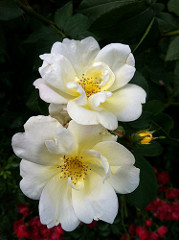

In [38]:
PIL.Image.open(str(roses[0]))

You can see we got the first image of our roses, lets check the 2nd image

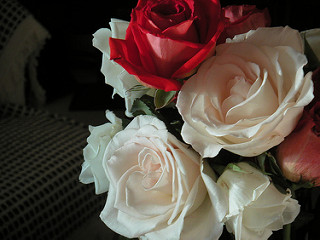

In [39]:
PIL.Image.open(str(roses[1]))

Now lets quiclly check for Tulips the same way

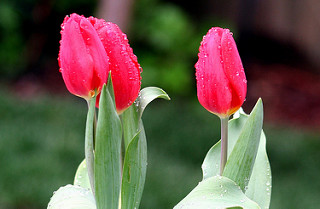

In [40]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

So this is like a Quick Data Visualization to kind of explore what u have in your dataset.

Now, we wanna create the classes names as well (meaning labels or names of these image categories which is roses, tulips, etc)

## Dictionary to store Images paths

So what we will do is, create a Dictionary of different flowers and all the image paths associated with it, and this will help us during our Model building process, so what we will do is, simply create a Dictionary with the key being names of the flower categories and values as the path using `glob(foldername/)`

In [41]:
flower_images_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

So now if i print lets say "roses" from the dictionary, it will give me all the image file path of roses image in the roses folder

In [42]:
flower_images_dict['roses']

[WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program

Similarly with the other flowers as well.

## Dictionary to store Flower labels
And now we also want to have a Dictionary for labels of the flowers, for example roses as 0, daisy as 1, dandelion as 2, sunflowers as 3 and tulips as 4

So we are just assigning a class number to each of these flowers, since our dataset contains only images, its not like a Tabular dataset where you have features and labels, here we just got Images, so yh thats why we have to do all this and assign a Numeric class label to each of the classes of flowers

In [44]:
flower_labels_dict = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

## OpenCV to read image into Numpy Array

Now what we can do is, we can use **Cv2** module to read this Images file into **OpenCV** object, into short of like a Numpy array, S

o **OpenCV** have this method called `imread(path)`, so you supply file path as argument and in return it will give you a Numpy array,

So what is our path? well its simply the **flower_images_dict** Dictonary, so lets say we pass the first image of roses from the dictionary, so we can do `flower_images_dict['roses'][0]` to get the path of the first image of roses

In [46]:
flower_images_dict['roses'][0]

WindowsPath('C:/Users/User/OneDrive/Documents/Faiz Khan Program/DEEP LEARNING/CODEBASICS/datas/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [49]:
img = cv2.imread(flower_images_dict['roses'][0])
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

See, it worked and made it into a 3D Numpy array, 

Sometime u might get an error because CV2 might not accept WindowsPath which is what our path is since we converted it using pathlib, so when this happens just wrap it in a `str()` like this:
`cv2.imread(str(flower_images_dict['roses'][0]))`.

But for us it worked without any error so yh no problem

In [50]:
img.shape

(240, 179, 3)

So u can see its a 3D Numpy array, X is 240, y is 179 and the 3 is for RGB Channel.

## Resize image using OpenCV

Now, OpenCV also has a function called `resize(imagename, (dimensions))` so you can take the Image, which is the 3D Numpy array reprentation, and resize it into a Standard size, because if you see, our Images in that folder are all of different dimension/sizes, so if u click on each image and check their property and go to Details, u will see some image has 320x240 dimensions, some 320x232, etc so they are all different dimensions, as when we Train our model, we want to make the dimensions same for all the Images.

Hence we need to resize them into a Standard size, we will resize it into 180x180 dimension

In [52]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

You see, it worked and resized the first rose image to 180x180, Now lets run a for loop and prepare our X and y. We will need to prepare our X train and y train, etc.

So first we will write that X and y are two blank arrays

Now we will iterate through all the Images and names from the Dictionary we created above called **flower_images_dict** which contains the flower class names and path. so what this will do, it will simply give you the key and values, which is flower names and path, lets just simply print it for now and show you

In [58]:
X, y = [], []
for flower_name, images in flower_images_dict.items():
    print(flower_name, len(images))

roses 641
daisy 633
dandelion 898
sunflowers 699
tulips 799


So, we just simply printed the flower names and len of images, meaning how many images are there for each flowers.

## X and y Splitting

Now, instead of printing, what we will do is, we will use a Nested for loop to go through all the images and simply convert them into Numpy 3D Array, just like we did above for 1 image, 

And then we want to also resize them into a Standard **180x180** dimension like we did above, 

And we will simply append all the 3D Numpy Resized image to **X**, 

And for **y**, we need to append a Numeric class, not the Text names, so how do we get that? Well its simple, we created another Dictionary above called `flower_labels_dict` and the keys are the exact same flower names as the keys from `flower_images_dict` Dictionary, so we can simply do this inside the loop `flower_labels_dict[flower_image]`, as flower_image contains names of each flower which can act as a key here

In [60]:
X, y = [], []
for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [61]:
y[:5]

[0, 0, 0, 0, 0]

So see, the first 5 images are of Roses, since rose label is 0.

We can also look at X, lets check the first value only

In [62]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [63]:
X[0].shape

(180, 180, 3)

## Convert X and y to Numpy arrays 

See its a simple 3D Array, Now these are 3D arrays but not Numpy arrays, so for convenience, we will simply convert these into Numpy arrays, nothing confusing

In [64]:
X = np.array(X)
y = np.array(y)

In [65]:
y[:5]

array([0, 0, 0, 0, 0])

So u can see its just the same one but now they are Numpy's array

## Train and Test splitting
Now, we will be doing the Usual step of Train Test split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [70]:
len(X_train), len(X_test)

(2752, 918)

## Scaling

So if u notice in every Image Classification tutorial that we did so far, there's always a very common and important part, that is Scaling, so yh we will divide our Train and Test dataset with 255 to scale them

In [71]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [73]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

See, now its all scaled in range of 0 to 1, this helps for model training thats why we always divide it by 255

## Building the Convolutional Neural Network (Without Data Augmentation)

Alright, now we are ready to build the Model!!

We are building a CNN and we will specify our layers 1 by 1, u already know from previous video about CNN is that we first always have Convolutional layer and MaxPooling layer then again Convolutional layer and MaxPooling layer, as much time as u want

1. So first we will make 3 Convolutional and Pooling layer with activation as "**relu**" and in the "padding" we will pass `same` which we already saw in the previous tutorial, it means have padding, if u put valid it means no padding.
2. In the Convolutional layer, the first number which is 16, it means we want 16 Filters, and the size of every Filter is 3 by 3 so hence we just put 3, and in second Convolutional layer we have 32 Filters and size is 3, third Convolutional layer we have 64 Filters and size is also 3
3. And u know after we specify the Convolutional layer and MaxPooling layer, we always have a Dense Network, so first before we start the Dense Network, we have to Flatten our values, hence we do Flatten layer first as we want to convert the array to a Single dimension
4. And then we will simply specify our Dense Network, we will just create 1 Hidden layer with 128 neurons and activation as relu again
5. The output layer now will have 5 Neurons, since thats the num of classes, i mean we got 5 different flower categories, so u see if its were a Binary Classification we only put 1 Neuron in the Output layer, but for Multi class classification like this, the Output layer will have Neurons same as num of classes we got, so in our case 5, So after Training during predictions, if 0th Neurons is activated it means its Roses, if 1th Neurons is activated it means its Daisy, etc

In [77]:
num_of_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(), # Pooling size is 2 by 2 by default if u dont specify
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    # we arent specifying any activation in Output layer, by default it uses nothing, 
    # its okay if u dont use any activation, it will use Linear Activation instead, will try it
    layers.Dense(num_of_classes) 
])

Now, we will Compile the CNN, we already saw previously that if you have exact value, which is not OneHotEncoded, then you use Sparse Categorical Entropy, we will use the one from Tensorflow.

**This is what `from_logits=True` mean from ChatGpt:**
* In TensorFlow, the from_logits=True parameter in the SparseCategoricalCrossentropy loss function signifies that the output passed to the loss function is not normalized (i.e., not probabilities), but rather logits. Logits are the raw, unnormalized predictions generated by the model before applying an activation function like softmax.

* When from_logits=True, the loss function expects the model's output to be logits, and it will internally apply the softmax function to convert these logits into probabilities before computing the loss. This approach is often preferred as it can improve numerical stability during training, especially when dealing with large values typical in logits.

* In summary, setting from_logits=True indicates that the model's output is in the form of logits, and the loss function should handle the conversion to probabilities internally for more stable and efficient training.

In [80]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Now will do Training

In [82]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


86/86 [==============================] - 37s 392ms/step - loss: 1.2516 - accuracy: 0.4618
Epoch 2/30
86/86 [==============================] - 34s 398ms/step - loss: 0.9654 - accuracy: 0.6275
Epoch 3/30
86/86 [==============================] - 34s 401ms/step - loss: 0.7329 - accuracy: 0.7213
Epoch 4/30
86/86 [==============================] - 35s 405ms/step - loss: 0.5669 - accuracy: 0.7849
Epoch 5/30
86/86 [==============================] - 35s 407ms/step - loss: 0.3331 - accuracy: 0.8823
Epoch 6/30
86/86 [==============================] - 35s 410ms/step - loss: 0.1862 - accuracy: 0.9368
Epoch 7/30
86/86 [==============================] - 37s 425ms/step - loss: 0.1086 - accuracy: 0.9669
Epoch 8/30
86/86 [==============================] - 36s 414ms/step - loss: 0.0493 - accuracy: 0.9898
Epoch 9/30
86/86 [==============================] - 41s 477ms/step - loss: 0.0253 - accuracy: 0.9956
Epoch 10/30
86/86 [==============================] - 39s 458ms/step - loss: 0.0170 - accu

So after a long time Training we got a very high accuracy score which is 99%, now lets check the accuracy by Evaluatating on Training set

In [83]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 73ms/step - loss: 2.2932 - accuracy: 0.6667


[2.293242931365967, 0.6666666865348816]

Here, we can see that for Test set we got only 66%, so this is an Example of **Overfitting** cuz on Training set it performed reeally well but on Test set it performed bad

Lets try to predict something as well

In [84]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 73ms/step


array([[ -5.2867556 ,  21.499952  ,  -6.2670407 , -10.59393   ,
        -10.898893  ],
       [  9.352533  ,  -0.90593797, -10.966575  ,  -5.1332154 ,
          5.9588604 ],
       [ -5.48228   ,  -1.1308819 ,  16.193619  , -15.682437  ,
         -3.2163076 ],
       ...,
       [  4.12835   ,  -8.410397  , -10.213259  ,   7.343605  ,
          1.4508857 ],
       [ 12.390104  ,   3.4652376 ,  -7.3616304 , -13.143612  ,
         -2.4604528 ],
       [ -2.5303674 , -11.868647  ,  -3.5849118 ,   6.519889  ,
          3.4861054 ]], dtype=float32)

Well it look like this, this is cuz we ddint specify any Activation function in the Output layer so it uses Linear Activation, if you want to convert this into a Porbability Score we can use the Tensorflow's Softmax() function which can convert this Predictions Numpy array into Set of Probability score, so for example lets convert the first predicitons into Probability score

In [85]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.3263776e-12, 1.0000000e+00, 8.7286764e-13, 1.1529315e-14,
       8.4988491e-15], dtype=float32)>

See we got this Tensor, its an Epsilon value, its now between 0 and 1, so we can use the `argmax()` func to get the index of the Highest Probability

In [86]:
np.argmax(score)

1

So u can see the highest score is of index 1, which is the second class which means this flower is "Daisy" since remember, For rose its 1, daisy is 2, and so on. So if we look at our y_test which is the Truth value, we can see that yes its Correct

In [93]:
y_test[0]

1

However, even tho is one is correct, its not good since the score during Evaluation is only 65% which is Horrible.

## Data Augmentation

So to handle this Overfitting, we can use **Data Augmentation**, so how to do this exactly?

Tensorflow has some good API's, we are going to use `keras.Sequential()` model once again as above, now we will do **Data Augmentation**.

So we will specify our Transformations inside the Sequential model

Lets start with maybe a random ZOOM, so we will use `layers.experimental.preprocessing.RandomZoom(0.3)`

You can go to this website = https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom
You will find different Transformations such as RandomZoom, RandomRotation, Rescaling, RandomFlip, etc

`0.7` is simply the power of the Zoom

In [108]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.7),
])

Now lets see how this work, lets first Plot our first Image using Matplotlib from our Training set and see

Text(0.5, 1.0, '0')

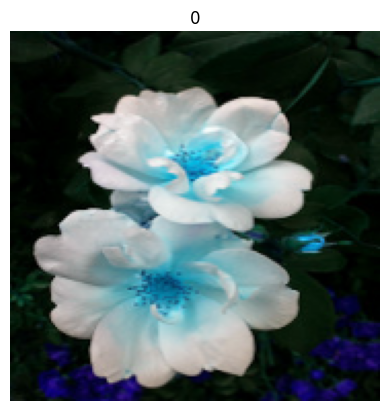

In [109]:
plt.axis("off")
plt.imshow(X[0])
plt.title(y[0])

So this is a 0 class flower meaning a Rose, 

And now lets try to Apply the Augmentation here, so how do we do that?

Well, u can call the `data_aug()` as a function, so when u call it as a function it will give u a Tensor array which is the Transformed Image

NOTE: We cant pass a single array like `X[0]` as it expects a 2D array, so will have to call it to the whole array of X and simply get the first value after that, like below

In [110]:
data_aug(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[9.32244396e+00, 1.91184425e+01, 8.78342438e+00],
        [9.78074169e+00, 2.10600586e+01, 9.94178963e+00],
        [1.06901712e+01, 2.31627617e+01, 9.85794926e+00],
        ...,
        [2.26088371e+01, 4.02920914e+01, 2.47269363e+01],
        [2.11355610e+01, 3.87852859e+01, 2.23066750e+01],
        [1.82569752e+01, 3.56222000e+01, 1.91133823e+01]],

       [[1.49329147e+01, 2.69047356e+01, 1.39355965e+01],
        [1.49382782e+01, 2.79071789e+01, 1.39534702e+01],
        [1.31230946e+01, 2.90790100e+01, 1.19845695e+01],
        ...,
        [2.03255634e+01, 3.91671906e+01, 2.17654152e+01],
        [1.90149593e+01, 3.79843407e+01, 2.09843407e+01],
        [1.76524048e+01, 3.58208389e+01, 1.88208389e+01]],

       [[1.87081070e+01, 3.19939804e+01, 1.79939804e+01],
        [1.88570633e+01, 3.20022049e+01, 1.80022049e+01],
        [1.87345581e+01, 3.00408630e+01, 1.68979244e+01],
        ...,
        [1.96528950e+01, 3.83878

You can see it gave us a Tensor, So this is our Transformed array, now when we plot this Transformed array, it expects a Numpy array so we will neeed to Convert it back to a Numpy array using `.numpy().astype("uint8"))`

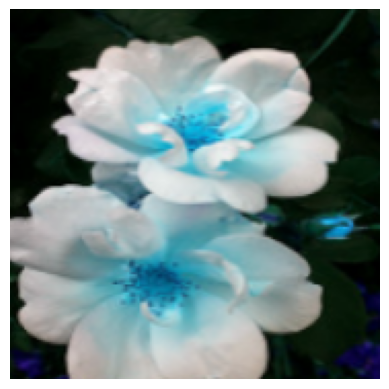

In [113]:
plt.axis("off")
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

You can see it randomly zoomed in, if u check the Original one and then this Transformed one u will see difference, also u can change the power of zoom above in the Sequential model. 

So everytime u run it, it will randomly Zoom in or out each time randomly, lets run it again and u see this time it Zoomed out

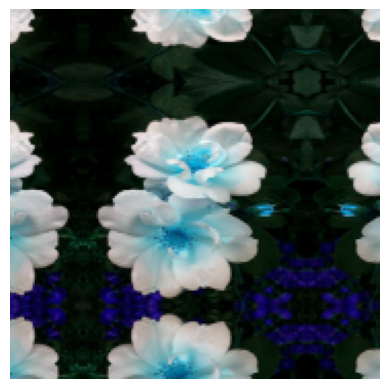

In [114]:
plt.axis("off")
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

So this is what the Transformation is doing, there are other types of Transformation such as RandomContrast which will give Contrast to ur images, lets give it a shot

In [115]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9),
])

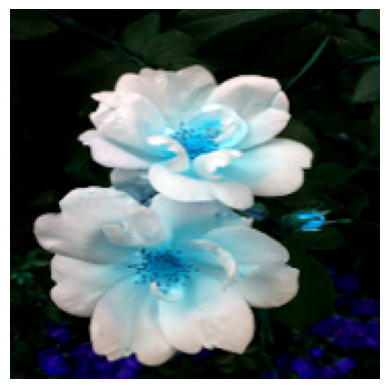

In [117]:
plt.axis("off")
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

You can see now it applied a Contrast randomly, so each time u run it, it will do random Contrast 

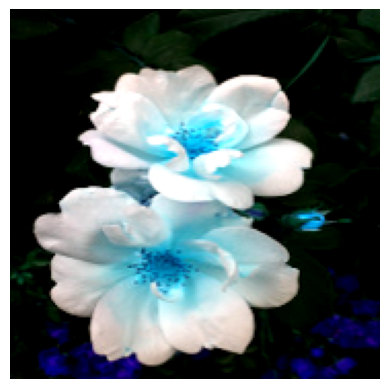

In [118]:
plt.axis("off")
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

Now lets try RandomRotation as well.

NOTE: Instead of saying `layers.experimental.preprocessing.RandomRotation(0.3)` you can simply also just say `layers.RandomRotation(0.3)`. Same with the other Transformation

In [122]:
data_aug = keras.Sequential([
    layers.RandomRotation(0.3),
])

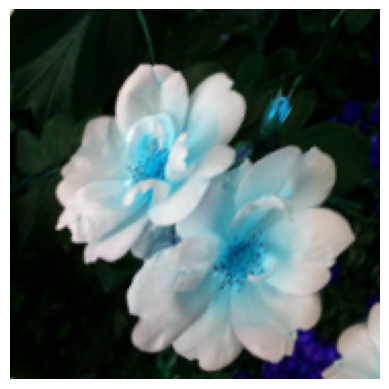

In [123]:
plt.axis("off")
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

You can see it applied a Random Rotation to our first Image, so each time u run it, it will rotate into different angles

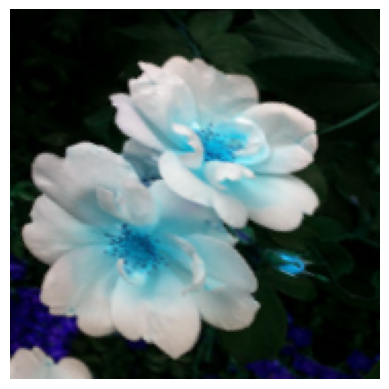

In [124]:
plt.axis("off")
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

So, anyways, this is very Useful as we can use this Functionality or Transformation to produce more samples from our Current Samples, we have around 3600 Samples, we will use this **Data Augmentation** to produce new samples and make our Model more Robust so it doesnt Overfit and can Generalize well, cuz when u supply rotated, scaled, contrast images in your Training and when u will do Predictions, it will be able to handle Variaty of images.

## Building the Convolutional Neural Network (With Data Augmentation)

Alright, so now I will use 3 Transformation, in the same Sequential() model, We will supply 3 Transformation which are Horizontal Flip, Rotation and Zoom and we will use this particular object in our actual CNN building process

In [132]:
img_height = X_train_scaled[0].shape[0]
img_width = X_train_scaled[0].shape[1]

In [135]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3)
])

So now we can make the same CNN Model we made above, but here we did 2 changes, one is we supplying the above created **data_augmentation** as the first layer and second is we supplying a Dropout layer, rest is same

In [136]:
num_of_classes = 5

model = Sequential([
    
    data_augmentation, # Added Data augmentation which we just created
    
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(), 
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2), # Added a Dropout layer to drop 20% of Neurons to prevent Overfitting further
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_of_classes) 
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [137]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 40s 424ms/step - loss: 1.4183 - accuracy: 0.3808
Epoch 2/30
86/86 [==============================] - 39s 455ms/step - loss: 1.1227 - accuracy: 0.5480
Epoch 3/30
86/86 [==============================] - 38s 444ms/step - loss: 1.0177 - accuracy: 0.5985
Epoch 4/30
86/86 [==============================] - 42s 489ms/step - loss: 0.9892 - accuracy: 0.6094
Epoch 5/30
86/86 [==============================] - 56s 651ms/step - loss: 0.9258 - accuracy: 0.6410
Epoch 6/30
86/86 [==============================] - 55s 643ms/step - loss: 0.8742 - accuracy: 0.6664
Epoch 7/30
86/86 [==============================] - 56s 646ms/step - loss: 0.8512 - accuracy: 0.6646
Epoch 8/30
86/86 [==============================] - 55s 645ms/step - loss: 0.8275 - accuracy: 0.6741
Epoch 9/30
86/86 [==============================] - 56s 649ms/step - loss: 0.8003 - accuracy: 0.6886
Epoch 10/30
86/86 [==============================] - 56s 646ms/step - loss: 0.7819 - accura

In [139]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 4s 112ms/step - loss: 0.7859 - accuracy: 0.7124


[0.7859198451042175, 0.7124183177947998]

Well we can see even tho the Training score is 76% but the Score for Test increased to 71% which is not much of a gap from the Training score.

So yh this is how we do Data Augmentation.